# 1.导入相关的依赖包

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import QubitSim2.model

# 2.创建量子线路

1.创建一个量子线路对象QubitSim2.model.Circuit()

In [14]:
# 创建一个量子线路
circuit = QubitSim2.model.Circuit()

2.使用add_qubit(C, phi_r, I_c_1, I_c_2)成员往刚刚创建的量子线路对象中添加比特

$C$为该量子比特的电容

$\phi_{r}$为该量子比特DCSQUID中的约化剩磁 $\frac{\phi_{r}}{\pi}\times\Phi_{0}$为DCQUID中的剩磁

$I_{c1}$为该量子比特DCSQUID第一个约瑟夫森结的临界电流

$I_{c2}$为该量子比特DCSQUID第二个约瑟夫森结的临界电流

In [15]:
# 创建比特1
# circuit.add_qubit(C, phi_r, I_c_1, I_c_2)用于向量子线路中添加一个比特对象
# C为比特的电容
# phi_r为比特DCSQUID中的约化剩磁,phi_r/pi*
C = 4.8E-14+1E-20
phi_r = 0.0*np.pi
I_c_1 = 2.8E-4/22000
I_c_2 = 2.8E-4/22000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建比特2
C = 4.8E-14+1E-20
phi_r = 0.08*np.pi
I_c_1 = 2.8E-4/22000
I_c_2 = 2.8E-4/22000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建coupler
C = 9.6E-14+1E-20
phi_r = 0.33*np.pi
I_c_1 = 2.8E-4/4000
I_c_2 = 2.8E-4/2000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

3.使用add_connect(qubit_index_1, qubit_index_2, C, L)添加连接对象
qubit_index_1和qubit_index_2为此连接对象所连接的两个比特的下标

比特的下标由比特加入量子线路的顺序决定(从0开始)

$C$为此连接的电容

$L$为此连接的电感

In [16]:
# 创建连接
C = 3.5E-16+1E-20
L = 1
circuit.add_connect(0, 1, C, L)
C = 8E-15+1E-20
L = 1
circuit.add_connect(1, 2, C, L)
C = 8E-15+1E-20
L = 1
circuit.add_connect(0, 2, C, L)

4.使用set_simulation_parameter(t_start, t_end, t_piece, operator_order_num, trigonometric_function_expand_order_num, low_energy_tag, high_energylevel_num)设置仿真参数

t_start为仿真的起始时间

t_end为仿真的结束时间

t_piece为仿真的时间间隔

operator_order_num为单量子比特本征矢空间的维度,若operator_order_num=3,则本征矢空间为$\{|0>,|1>,|2>\}$

trigonometric_function_expand_order_num为矩阵三角函数计算时的泰勒展开阶数

low_energy_tag为低能级标识,例如:low_energy_tag=1意味着$|0>,|1>$将会被视为低能级,其余能级被视为高能级

high_energylevel_num为直积态中高能级最大数量,量子演化将在这些直积态组成的子空间内计算

In [24]:
# 设置仿真参数
t_start = 0
t_end = 100E-9
t_piece = 1E-11
operator_order_num = 4
trigonometric_function_expand_order_num = 8
low_energy_tag = 2
high_energylevel_num = 1
circuit.set_simulation_parameter(t_start, t_end, t_piece, operator_order_num,
                                 trigonometric_function_expand_order_num, low_energy_tag, high_energylevel_num)


5.设置子空间
circuit.subspace = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]的具体含义是

此量子线路有三个比特，仿真之后的circuit.time_evolution_operator_dressed_sub矩阵的基底为$\{|000>,|010>,|100>,|110>\}$

比特的顺序是根据比特的index从左向右排布的

In [18]:
# 设置子空间
circuit.subspace = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]

6.add_signal(qubit_index,'x',signal_fun)设置信号函数

qubit_index为比特的下标

第二个参数是信号加入的模式,'x'意味着信号加入到比特的主环路上(X控制),'z'意味着信号加入到比特的DCSQUID上(Z控制)

第三个参数是用户自定义的信号函数

In [20]:
# 设置信号函数

N = len(circuit.simulator.t_list)
pulse_time = 100.0
rise_time = 0.0
amplitude = 0.0727293384688140
frequency = 0.129946838635065
wave_para = [0, 10000, 0, 0, 0, -1174.41312058193, 0, 0]
envolope = np.zeros(N)
waveform_ts = np.zeros(N)
wave_para_1 = wave_para[0]
for i in range(N):
    t_now = circuit.simulator.t_list[i]*1E9
    if (t_now < rise_time) and (t_now > 0):
        envolope[i] = (1-np.cos(t_now/rise_time*np.pi))/2*amplitude
        waveform_ts[i] = envolope[i]*np.cos(t_now*2*np.pi*frequency)
    elif (t_now >= rise_time) and (t_now <= rise_time+pulse_time):
        envolope[i] = 0
        for k in range(int(np.floor(len(wave_para)/2))):
            envolope[i] = envolope[i] + wave_para[k*2] * \
                (1-np.cos((k+1)*np.pi*(t_now-rise_time)/pulse_time))
            envolope[i] = envolope[i] + wave_para[k*2+1] * \
                (np.sin((k+1)*np.pi*(t_now-rise_time)/pulse_time))
        envolope[i] = (envolope[i]+1)*amplitude
        waveform_ts[i] = envolope[i]*np.cos(t_now*2*np.pi*frequency)
    elif (t_now > rise_time+pulse_time) and (t_now < 2*rise_time+pulse_time):
        envolope[i] = (1-np.cos((t_now-pulse_time)/rise_time *
                       np.pi))/2*amplitude*(1+2*wave_para_1)
        waveform_ts[i] = envolope[i]*np.cos(t_now*2*np.pi*frequency)
amp_norm = np.mean(envolope[1:])/(pulse_time+rise_time) * \
    (pulse_time+2*rise_time)/amplitude
envolope = envolope/amp_norm
waveform_ts = waveform_ts/amp_norm


def signal_fun(t):
    return waveform_ts[int(round(t/(t_piece/2)))]


# 将信号加入量子线路
qubit_index = 2
circuit.add_signal(qubit_index, 'z', signal_fun)


# 3运行量子线路

In [26]:
circuit.run()

Calculating the whole time evolution operator:


100% |########################################################################|


# 4数据处理

energy_levels_show_process(circuit.Hamiltonian_generator(),subspace)可以查看子空间的能级结构

circuit.Hamiltonian_generator()为初始的哈密顿量

circuit.Hamiltonian_generator('m',n)为第n份时间的哈密顿量

subspace为子空间

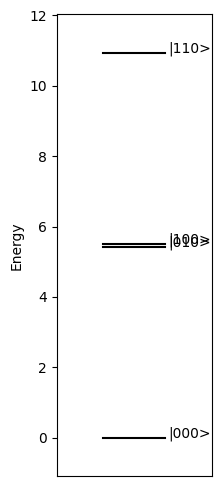

In [27]:
circuit.energy_levels_show_process(circuit.Hamiltonian_generator(),circuit.subspace)

circuit.time_evolution_operator_dressed_sub存储了子空间下的仿真之后的演化算符,用户可以自行调用进行数据处理

In [28]:
ACCZ_matrix = circuit.time_evolution_operator_dressed_sub
print("ACCZ_matrix:")
for i in range(4):
    for j in range(4):
        print("%.4f" % np.abs(ACCZ_matrix[i][j]), end='_')
        print("%.4f" % np.angle(ACCZ_matrix[i][j]), end=',')
    print()
phase_globle = np.angle(ACCZ_matrix[0][0])
phase1 = np.angle(ACCZ_matrix[1][1])
phase2 = np.angle(ACCZ_matrix[2][2])
phase_U = np.diag([np.exp(-complex(0, 1)*phase_globle), np.exp(-complex(0, 1)*phase1),
                  np.exp(-complex(0, 1)*phase2), np.exp(-complex(0, 1)*(phase1+phase2-phase_globle))])
ACCZ_matrix_free_phase=np.matmul(phase_U,ACCZ_matrix)
print("\nACCZ_matrix(phase free):")
for i in range(4):
    for j in range(4):
        print("%.4f" % np.abs(ACCZ_matrix_free_phase[i][j]), end='_')
        print("%.4f" % np.angle(ACCZ_matrix_free_phase[i][j]), end=',')
    print()

ACCZ_matrix:
1.0000_-0.0451,0.0000_0.3705,0.0000_-0.0204,0.0000_-2.7982,
0.0000_0.4216,0.9996_0.8730,0.0269_-1.1207,0.0000_2.2136,
0.0000_1.5592,0.0269_0.4587,0.9996_1.6066,0.0000_-2.7340,
0.0000_-0.9703,0.0000_0.9940,0.0000_0.6502,0.9999_-0.5296,

ACCZ_matrix(phase free):
1.0000_0.0000,0.0000_0.4157,0.0000_0.0247,0.0000_-2.7531,
0.0000_-0.4514,0.9996_0.0000,0.0269_-1.9937,0.0000_1.3407,
0.0000_-0.0474,0.0269_-1.1479,0.9996_0.0000,0.0000_1.9425,
0.0000_2.7882,0.0000_-1.5307,0.0000_-1.8745,0.9999_-3.0543,
